[[0.05 1.   0.89 0.37 0.14 0.1  0.2 ]
 [0.02 1.   0.91 0.16 0.11 0.05 0.02]
 [0.   0.   0.96 0.17 0.44 0.1  0.  ]
 [0.62 0.   1.   0.28 0.22 0.21 1.  ]
 [0.12 1.   0.99 0.34 0.31 0.25 0.  ]
 [0.17 0.   0.99 0.09 0.13 0.1  0.04]
 [0.   0.   1.   0.14 0.08 0.09 0.  ]
 [0.55 0.   0.84 0.1  0.05 0.06 0.  ]
 [0.   0.   0.98 0.18 0.19 0.18 0.01]
 [0.22 1.   0.66 0.94 0.07 0.04 0.02]
 [0.57 1.   1.   1.   1.   1.   0.  ]
 [0.02 0.   0.46 0.04 0.08 0.02 0.  ]
 [0.   0.   0.98 0.22 0.14 0.19 0.  ]
 [0.22 1.   0.95 0.19 0.15 0.09 0.01]
 [0.   0.   0.99 0.19 0.16 0.14 0.  ]
 [0.35 1.   0.98 0.21 0.12 0.11 0.  ]
 [0.   0.   0.4  0.05 0.01 0.01 0.07]
 [0.45 0.   1.   0.16 0.15 0.15 0.04]]
[[0.05, 1.0, 0.89, 0.37, 0.14, 0.1, 0.2], [0.02, 1.0, 0.91, 0.16, 0.11, 0.05, 0.02], [0.0, 0.0, 0.96, 0.17, 0.44, 0.1, 0.0], [0.62, 0.0, 1.0, 0.28, 0.22, 0.21, 1.0], [0.12, 1.0, 0.99, 0.34, 0.31, 0.25, 0.0], [0.17, 0.0, 0.99, 0.09, 0.13, 0.1, 0.04], [0.0, 0.0, 1.0, 0.14, 0.08, 0.09, 0.0], [0.55, 0.0, 0.84, 0.1, 0.

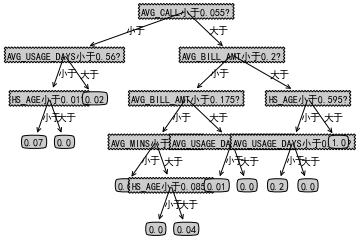

In [11]:
import collections
from math import log
import operator
import pandas as pd
from sklearn.model_selection import train_test_split as TTS


def calcShannonEnt(dataSet):
    """
    计算给定数据集的信息熵(香农熵)
    :param dataSet:
    :return:
    """
    # 计算出数据集的总数
    numEntries = len(dataSet)

    # 用来统计标签
    labelCounts = collections.defaultdict(int)

    # 循环整个数据集，得到数据的分类标签
    for featVec in dataSet:
        # 得到当前的标签
        currentLabel = featVec[-1]
        # featVec[-1]=int(featVec[-1][1,2])
        # 将对应的标签值加一
        labelCounts[currentLabel] += 1

    # 默认的信息熵
    shannonEnt = 0.0

    for key in labelCounts:
        # 计算出当前分类标签占总标签的比例数
        prob = float(labelCounts[key]) / numEntries

        # 以2为底求对数
        shannonEnt -= prob * log(prob, 2)

    return shannonEnt


def splitDataSetForSeries(dataSet, axis, value):
    """
    按照给定的数值，将数据集分为不大于和大于两部分
    :param dataSet: 要划分的数据集
    :param i: 特征值所在的下标
    :param value: 划分值
    :return:
    """
    # 用来保存不大于划分值的集合
    eltDataSet = []
    # 用来保存大于划分值的集合
    gtDataSet = []
    # 进行划分，保留该特征值
    for feat in dataSet:
        if feat[axis] <= value:
            eltDataSet.append(feat)
        else:
            gtDataSet.append(feat)

    return eltDataSet, gtDataSet


def splitDataSet(dataSet, axis, value):
    """
    按照给定的特征值，将数据集划分
    :param dataSet: 数据集
    :param axis: 给定特征值的坐标
    :param value: 给定特征值满足的条件，只有给定特征值等于这个value的时候才会返回
    :return:
    """
    # 创建一个新的列表，防止对原来的列表进行修改
    retDataSet = []

    # 遍历整个数据集
    for featVec in dataSet:
        # 如果给定特征值等于想要的特征值
        if featVec[axis] == value:
            # 将该特征值前面的内容保存起来
            reducedFeatVec = featVec[:axis]
            # 将该特征值后面的内容保存起来，所以将给定特征值给去掉了
            reducedFeatVec.extend(featVec[axis + 1:])
            # 添加到返回列表中
            retDataSet.append(reducedFeatVec)

    return retDataSet


def calcInfoGainForSeries(dataSet, i, baseEntropy):
    """
    计算连续值的信息增益
    :param dataSet:整个数据集
    :param i: 对应的特征值下标
    :param baseEntropy: 基础信息熵
    :return: 返回一个信息增益值，和当前的划分点
    """

    # 记录最大的信息增益
    maxInfoGain = 0.0

    # 最好的划分点
    bestMid = -1

    # 得到数据集中所有的当前特征值列表
    featList = [example[i] for example in dataSet]

    # 得到分类列表
    classList = [example[-1] for example in dataSet]

    dictList = dict(zip(featList, classList))

    # 将其从小到大排序，按照连续值的大小排列
    # print(dictList[1])
    sortedFeatList = sorted(dictList.items(), key=operator.itemgetter(0))

    # 计算连续值有多少个
    numberForFeatList = len(sortedFeatList)

    # 计算划分点，保留三位小数
    midFeatList = [round((sortedFeatList[i][0] + sortedFeatList[i+1][0])/2.0, 3)for i in range(numberForFeatList - 1)]

    # 计算出各个划分点信息增益
    for mid in midFeatList:
        # 将连续值划分为不大于当前划分点和大于当前划分点两部分
        eltDataSet, gtDataSet = splitDataSetForSeries(dataSet, i, mid)

        # 计算两部分的特征值熵和权重的乘积之和
        newEntropy = len(eltDataSet)/len(sortedFeatList)*calcShannonEnt(eltDataSet) + len(gtDataSet)/len(sortedFeatList)*calcShannonEnt(gtDataSet)

        # 计算出信息增益
        infoGain = baseEntropy - newEntropy
        # print('当前划分值为：' + str(mid) + '，此时的信息增益为：' + str(infoGain))
        if infoGain > maxInfoGain:
            bestMid = mid
            maxInfoGain = infoGain

    return maxInfoGain, bestMid


def calcInfoGain(dataSet ,featList, i, baseEntropy):
    """
    计算信息增益
    :param dataSet: 数据集
    :param featList: 当前特征列表
    :param i: 当前特征值下标
    :param baseEntropy: 基础信息熵
    :return:
    """
    # 将当前特征唯一化，也就是说当前特征值中共有多少种
    uniqueVals = set(featList)

    # 新的熵，代表当前特征值的熵
    newEntropy = 0.0

    # 遍历现在有的特征的可能性
    for value in uniqueVals:
        # 在全部数据集的当前特征位置上，找到该特征值等于当前值的集合
        subDataSet = splitDataSet(dataSet=dataSet, axis=i, value=value)
        # 计算出权重
        prob = len(subDataSet) / float(len(dataSet))
        # 计算出当前特征值的熵
        newEntropy += prob * calcShannonEnt(subDataSet)

    # 计算出“信息增益”
    infoGain = baseEntropy - newEntropy

    return infoGain


def chooseBestFeatureToSplit(dataSet, labels):
    """
    选择最好的数据集划分特征，根据信息增益值来计算，可处理连续值
    :param dataSet:
    :return:
    """
    # 得到数据的特征值总数
    numFeatures = len(dataSet[0]) - 1

    # 计算出基础信息熵
    baseEntropy = calcShannonEnt(dataSet)

    # 基础信息增益为0.0
    bestInfoGain = 0.0

    # 最好的特征值
    bestFeature = -1

    # 标记当前最好的特征值是不是连续值
    flagSeries = 0

    # 如果是连续值的话，用来记录连续值的划分点
    bestSeriesMid = 0.0

    # 对每个特征值进行求信息熵
    for i in range(numFeatures):

        # 得到数据集中所有的当前特征值列表
        featList = [example[i] for example in dataSet]

        if isinstance(featList[0], str):
            infoGain = calcInfoGain(dataSet, featList, i, baseEntropy)
        else:
            # print('当前划分属性为：' + str(labels[i]))
            infoGain, bestMid = calcInfoGainForSeries(dataSet, i, baseEntropy)

        # print('当前特征值为：' + labels[i] + '，对应的信息增益值为：' + str(infoGain))

        # 如果当前的信息增益比原来的大
        if infoGain > bestInfoGain:
            # 最好的信息增益
            bestInfoGain = infoGain
            # 新的最好的用来划分的特征值
            bestFeature = i

            flagSeries = 0
            if not isinstance(dataSet[0][bestFeature], str):
                flagSeries = 1
                bestSeriesMid = bestMid

    # print('信息增益最大的特征为：' + labels[bestFeature])
    if flagSeries:
        return bestFeature, bestSeriesMid
    else:
        return bestFeature


def createDataSet():
    """
    创建测试的数据集，里面的数值中具有连续值
    :return:
    """
    data = pd.read_csv(r"C:\Users\96361\iCloudDrive\数据挖掘实践-胡仕成\B\continuousData\Sampledata-continuous.CSV",encoding='GBK')
    data_features = data.iloc[:,:7].to_numpy()
    data_target = data.iloc[:,7].to_numpy()

    Xtrain, Xtest, Ytrain, Ytest = TTS(data_features, data_target, test_size=0.3, random_state=420)
    print(Xtrain)
    dataSet=Xtrain.tolist()
    print(dataSet)
    labels = ['HS_AGE',	'VAS_AR_FLAG',	'AVG_USAGE_DAYS',	'AVG_BILL_AMT'	,'AVG_MINS',	'AVG_CALL'	,'AVG_VAS_GAMES']

    # 特征对应的所有可能的情况
    labels_full = {}
    for i in range(len(labels)):
        labelList = [example[i] for example in dataSet]
        uniqueLabel = set(labelList)
        labels_full[labels[i]] = uniqueLabel

    return dataSet, labels, labels_full

def majorityCnt(classList):
    """
    找到次数最多的类别标签
    :param classList:
    :return:
    """
    # 用来统计标签的票数
    classCount = collections.defaultdict(int)

    # 遍历所有的标签类别
    for vote in classList:
        classCount[vote] += 1

    # 从大到小排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)

    # 返回次数最多的标签
    return sortedClassCount[0][0]


def createTree(dataSet, labels):
    """
    创建决策树
    :param dataSet: 数据集
    :param labels: 特征标签
    :return:
    """
    # 拿到所有数据集的分类标签
    classList = [example[-1] for example in dataSet]

    # 统计第一个标签出现的次数，与总标签个数比较，如果相等则说明当前列表中全部都是一种标签，此时停止划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]

    # 计算第一行有多少个数据，如果只有一个的话说明所有的特征属性都遍历完了，剩下的一个就是类别标签
    if len(dataSet[0]) == 1:
        # 返回剩下标签中出现次数较多的那个
        return majorityCnt(classList)

    # 选择最好的划分特征，得到该特征的下标
    bestFeat = chooseBestFeatureToSplit(dataSet=dataSet, labels=labels)

    # 得到最好特征的名称
    bestFeatLabel = ''

    # 记录此刻是连续值还是离散值,1连续，2离散
    flagSeries = 0

    # 如果是连续值，记录连续值的划分点
    midSeries = 0.0

    # 如果是元组的话，说明此时是连续值
    if isinstance(bestFeat, tuple):
        # 重新修改分叉点信息
        bestFeatLabel = str(labels[bestFeat[0]]) + '小于' + str(bestFeat[1]) + '?'
        # 得到当前的划分点
        midSeries = bestFeat[1]
        # 得到下标值
        bestFeat = bestFeat[0]
        # 连续值标志
        flagSeries = 1
    else:
        # 得到分叉点信息
        bestFeatLabel = labels[bestFeat]
        # 离散值标志
        flagSeries = 0

    # 使用一个字典来存储树结构，分叉处为划分的特征名称
    myTree = {bestFeatLabel: {}}

    # 得到当前特征标签的所有可能值
    featValues = [example[bestFeat] for example in dataSet]

    # 连续值处理
    if flagSeries:
        # 将连续值划分为不大于当前划分点和大于当前划分点两部分
        eltDataSet, gtDataSet = splitDataSetForSeries(dataSet, bestFeat, midSeries)
        # 得到剩下的特征标签
        subLabels = labels[:]
        # 递归处理小于划分点的子树
        subTree = createTree(eltDataSet, subLabels)
        myTree[bestFeatLabel]['小于'] = subTree

        # 递归处理大于当前划分点的子树
        subTree = createTree(gtDataSet, subLabels)
        myTree[bestFeatLabel]['大于'] = subTree

        return myTree

    # 离散值处理
    else:
        # 将本次划分的特征值从列表中删除掉
        del (labels[bestFeat])
        # 唯一化，去掉重复的特征值
        uniqueVals = set(featValues)
        # 遍历所有的特征值
        for value in uniqueVals:
            # 得到剩下的特征标签
            subLabels = labels[:]
            # 递归调用，将数据集中该特征等于当前特征值的所有数据划分到当前节点下，递归调用时需要先将当前的特征去除掉
            subTree = createTree(splitDataSet(dataSet=dataSet, axis=bestFeat, value=value), subLabels)
            # 将子树归到分叉处下
            myTree[bestFeatLabel][value] = subTree
        return myTree
    
import matplotlib.pylab as plt
import matplotlib

# 能够显示中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']

# 分叉节点，也就是决策节点
decisionNode = dict(boxstyle="sawtooth", fc="0.8")

# 叶子节点
leafNode = dict(boxstyle="round4", fc="0.8")

# 箭头样式
arrow_args = dict(arrowstyle="<-")


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """
    绘制一个节点
    :param nodeTxt: 描述该节点的文本信息
    :param centerPt: 文本的坐标
    :param parentPt: 点的坐标，这里也是指父节点的坐标
    :param nodeType: 节点类型,分为叶子节点和决策节点
    :return:
    """
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def getNumLeafs(myTree):
    """
    获取叶节点的数目
    :param myTree:
    :return:
    """
    # 统计叶子节点的总数
    numLeafs = 0

    # 得到当前第一个key，也就是根节点
    firstStr = list(myTree.keys())[0]

    # 得到第一个key对应的内容
    secondDict = myTree[firstStr]

    # 递归遍历叶子节点
    for key in secondDict.keys():
        # 如果key对应的是一个字典，就递归调用
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        # 不是的话，说明此时是一个叶子节点
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    """
    得到数的深度层数
    :param myTree:
    :return:
    """
    # 用来保存最大层数
    maxDepth = 0

    # 得到根节点
    firstStr = list(myTree.keys())[0]

    # 得到key对应的内容
    secondDic = myTree[firstStr]

    # 遍历所有子节点
    for key in secondDic.keys():
        # 如果该节点是字典，就递归调用
        if type(secondDic[key]).__name__ == 'dict':
            # 子节点的深度加1
            thisDepth = 1 + getTreeDepth(secondDic[key])

        # 说明此时是叶子节点
        else:
            thisDepth = 1

        # 替换最大层数
        if thisDepth > maxDepth:
            maxDepth = thisDepth

    return maxDepth


def plotMidText(cntrPt, parentPt, txtString):
    """
    计算出父节点和子节点的中间位置，填充信息
    :param cntrPt: 子节点坐标
    :param parentPt: 父节点坐标
    :param txtString: 填充的文本信息
    :return:
    """
    # 计算x轴的中间位置
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    # 计算y轴的中间位置
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    # 进行绘制
    createPlot.ax1.text(xMid, yMid, txtString)


def plotTree(myTree, parentPt, nodeTxt):
    """
    绘制出树的所有节点，递归绘制
    :param myTree: 树
    :param parentPt: 父节点的坐标
    :param nodeTxt: 节点的文本信息
    :return:
    """
    # 计算叶子节点数
    numLeafs = getNumLeafs(myTree=myTree)

    # 计算树的深度
    depth = getTreeDepth(myTree=myTree)

    # 得到根节点的信息内容
    firstStr = list(myTree.keys())[0]

    # 计算出当前根节点在所有子节点的中间坐标,也就是当前x轴的偏移量加上计算出来的根节点的中心位置作为x轴（比如说第一次：初始的x偏移量为：-1/2W,计算出来的根节点中心位置为：(1+W)/2W，相加得到：1/2），当前y轴偏移量作为y轴
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)

    # 绘制该节点与父节点的联系
    plotMidText(cntrPt, parentPt, nodeTxt)

    # 绘制该节点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)

    # 得到当前根节点对应的子树
    secondDict = myTree[firstStr]

    # 计算出新的y轴偏移量，向下移动1/D，也就是下一层的绘制y轴
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD

    # 循环遍历所有的key
    for key in secondDict.keys():
        # 如果当前的key是字典的话，代表还有子树，则递归遍历
        if isinstance(secondDict[key], dict):
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 计算新的x轴偏移量，也就是下个叶子绘制的x轴坐标向右移动了1/W
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            # 打开注释可以观察叶子节点的坐标变化
            # print((plotTree.xOff, plotTree.yOff), secondDict[key])
            # 绘制叶子节点
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 绘制叶子节点和父节点的中间连线内容
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))

    # 返回递归之前，需要将y轴的偏移量增加，向上移动1/D，也就是返回去绘制上一层的y轴
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


def createPlot(inTree):
    """
    需要绘制的决策树
    :param inTree: 决策树字典
    :return:
    """
    # 创建一个图像
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    # 计算出决策树的总宽度
    plotTree.totalW = float(getNumLeafs(inTree))
    # 计算出决策树的总深度
    plotTree.totalD = float(getTreeDepth(inTree))
    # 初始的x轴偏移量，也就是-1/2W，每次向右移动1/W，也就是第一个叶子节点绘制的x坐标为：1/2W，第二个：3/2W，第三个：5/2W，最后一个：(W-1)/2W
    plotTree.xOff = -0.5/plotTree.totalW
    # 初始的y轴偏移量，每次向下或者向上移动1/D
    plotTree.yOff = 1.0
    # 调用函数进行绘制节点图像
    plotTree(inTree, (0.5, 1.0), '')
    # 绘制
    plt.show()


if __name__ == '__main__':
    """
    处理连续值时候的决策树
    """
    dataSet, labels, labels_full = createDataSet()
    myTree = createTree(dataSet, labels)
    print(myTree)
    createPlot(myTree)



In [12]:
# HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE
# 0.12,0,0.72,0.01, 0.02,0.02,0,? 2G
# 0.57,1,1,1,   1,1,0,2G
# 2G
# 0.33,0,0.11,0,    0,0,0,2G
# 2G
# 0.22,1,0.66,0.94, 0.07,0.04,0.02,2G
# 2G
# 0.02,0,0.46,0.04, 0.08,0.02,0,2G
# 2G
# 0.32,1,0,0.04,    0,0,0,2G
# 2G

print("=================")
print("用后五个数据做为测试集,根据上图,可以得到准确率为:5/5")
print("=================")

用后五个数据做为测试集,根据上图,可以得到准确率为:5/5
